<div style="font-size: 20px">
1. The expression of Van der Waals equation of state (Cubic EoS) is:

<img style="float: center;" src="van der waals EoS.JPG" width="15%">

<div style="font-size: 20px">
At critical point $T_c$, $V_c$ and $P_c$, the system is teetering between liquid and gaseous phases. Van der Waals showed that this is a saddle point of his equation, which means the first and second derivatives of P with respect to V at the critical point $T_c$ and $V_c$ are equal to zero. 

<div style="font-size: 20px">
(1) Based on this information, prove that the expression of the coefficients a and b are:

<div style="font-size: 20px">
$a=\frac{27}{64}\frac{{(RT_c)}^2}{p_c}$,   $b=\frac{RT_c}{8p_c}$

In [1]:
# write your answer here

<div style="font-size: 20px">
(2) Consider there is propane placed in the container sealed with a friction-free piston and maintained at temperature T = 0 ℃. Calculate $a$ and $b$ of Van der Waals equation based on the above equations in question (1), and then plot the pressure as a function of the molar volume $V$ in the range of 0.003 $m^3/mol$ to 0.03 $m^3/mol$. The critical properties of propane: $T_c$=369.82 K and $P_c$=42.6 bar.

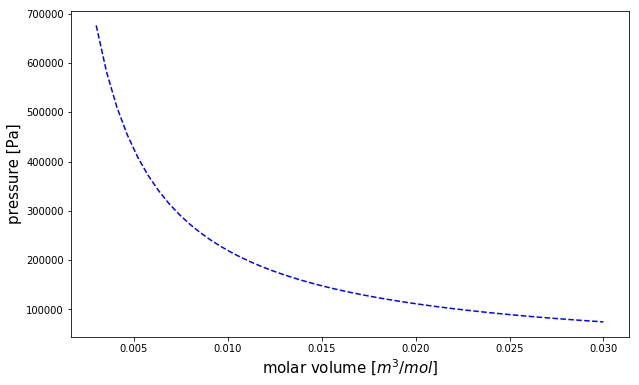

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Tc = 369.82       # K
Pc = 42.6*10**5   # Pa
R = 8.314         # J/(molK)
T = 0 + 273.15    # kelvin
a = 27 / 64 * R**2 * Tc**2 / (Pc)
b = R * Tc / (8 * Pc)
V = np.linspace(0.003, 0.03, 50)
P1 = np.zeros(np.size(V))

for i in range(np.size(V)):
    P1[i] = R*T/(V[i]-b)-a/(V[i]**2)
    
plt.figure(figsize=(10, 6))
plt.plot(V, P1, 'b--')
plt.xlabel('molar volume [$m^3/mol$]',fontsize = 15)
plt.ylabel('pressure [Pa]',fontsize = 15)
plt.show()

<div style="font-size: 20px">
(3) Consider now there is 1 mol of propane is at an initial pressure $P_1$=1 atm and temperature T = 0 ℃. Later, the system undergoes a reversible and isothermal compression up to a pressure of $P_2$=6.5 atm. Based on the plot in the last question, find the values of molar volumes at the initial and final state uisng bisection method.

In [3]:
def obj(V, P):
    return P- (R*T/(V-b)-a/(V**2))

tol = 1e-7  # tolerance  
V_left = 0.001
V_right = 0.03

def bisection(a,b,P):
    while (np.abs(a-b)>tol):
        V_mid = (a + b)/2
        r_left = obj(a, P)
        r_right = obj(b, P)
        r_mid = obj(V_mid, P)
        if (r_left*r_mid<0):
            b = V_mid
        else:
            a = V_mid
    return V_mid

P_initial = 1*100000
V_initial = bisection(V_left,V_right,P_initial)
P_final = 6.5*100000
V_final = bisection(V_left,V_right,P_final)
print(V_initial)
print(V_final)

0.022383329391479495
0.0031382389068603514


<div style="font-size: 20px">
2. Flash calculation

<img style="float: center;" src="Slide2.JPG" width="80%">

<div style="font-size: 20px">
With the given partitioning coefficients K1=3,K2=0.4,K3=0.05, please use the Rachford-Rice equation to calculate the molar fraction x in the liquid phase and the molar fraction y in the vapor phase for the give overall molar fraction below:

(1) z1 = 0.5, z2 = 0.5, z3 = 0; 

(2) z1 = 0.5, z2 = 0, z3 = 0.5; 

(3) z1 = 1/3, z2 = 1/3, z3 = 1/3.

In [4]:
import numpy as np
# flash calculation constant K values
K1 = 3
K2 = 0.4
K3 = 0.05
K = np.array([K1,K2,K3])

In [5]:
# Define Rachford-Rice equation

def RR(K,z):
    eps = 1e-12
    a = 1 / (1 - np.max(K)) + eps
    b = 1 / (1 - np.min(K)) - eps
    max_iter = 100
    n_iter = 0
    for i in range(1, max_iter):
        V = 0.5 * (a + b)

        r = np.sum(z * (K - 1) / (V * (K - 1) + 1))

        if r > 0:
            a = V
        else:
            b = V
            
        n_iter += 1

        if abs(r) < 1e-12:
            break

    
    x = z / (V * (K - 1) + 1)
    y = K * x
    return x, y, n_iter

In [6]:
z = [[0.5, 0.5, 0],
     [0.5, 0, 0.5],
     [1/3, 1/3, 1/3]]

for z_temp in z:
    print(RR(K,z_temp))

(array([0.23076923, 0.76923077, 0.        ]), array([0.69230769, 0.30769231, 0.        ]), 38)
(array([0.3220339, 0.       , 0.6779661]), array([0.96610169, 0.        , 0.03389831]), 1)
(array([0.28009438, 0.35349024, 0.36641539]), array([0.84028314, 0.14139609, 0.01832077]), 39)
